In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc as pm

In [2]:
ways = np.array([0,3,8,9,0])
ways / np.sum(ways)

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

# 2.1 Building a Model

"(1) Data story: Motivate the model by narrating how the data might arise.
(2) Update: Educate your model by feeding it the data.
(3) Evaluate: All statistical models require supervision, leading to model revision." (p. 29)

In [3]:
stats.binom.pmf(k = 6, n = 9, p = 0.5)

0.16406250000000003

### 2.4 Motors

#### 2.4.3 Grid Approximation

(1) Define the grid. This means you decide how many points to use in estimating the
posterior, and then you make a list of the parameter values on the grid.

(2) Compute the value of the prior at each parameter value on the grid.

(3) Compute the likelihood at each parameter value.

(4) Compute the unstandardized posterior at each parameter value, by multiplying the
prior by the likelihood.

(5) Finally, standardize the posterior, by dividing each value by the sum of all values.

In [4]:
def get_graph_approximation_posterior(p_grid, prior) -> np.array:
    # (1) Define grid
    p_grid = p_grid

    # (2) Define prior
    prior = prior

    # (3) Compute the likelihood at each value in the grid
    likelihood = stats.binom.pmf(6, 9, p_grid)

    # (4) Compute the unstandardized posterior
    unstd_posterior = likelihood * prior

    # (5) Standardize the posterior
    posterior = unstd_posterior / np.sum(unstd_posterior)

    return posterior

In [5]:
# Define our graph approximator
def plot_graph_approximation(p_grid, posterior) -> plt:
    plt.plot(p_grid, posterior, marker='o', linestyle='-', color='blue')
    plt.xlabel("Probability of water")
    plt.ylabel("Posterior probability")
    plt.title(f"{len(p_grid)} points")

    return plt.show()

In [6]:
# Define our initial p_grid and prior
p_grid = np.linspace(0, 1, 20)
prior = np.ones(20)

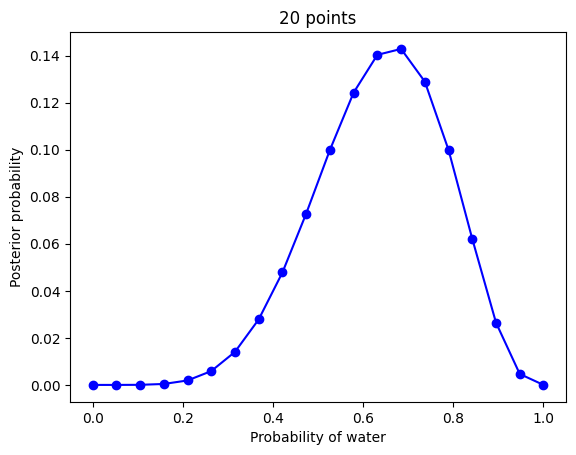

In [7]:
# Plot the posterior distribution
posterior = get_graph_approximation_posterior(p_grid, prior)
plot_graph_approximation(p_grid, posterior)

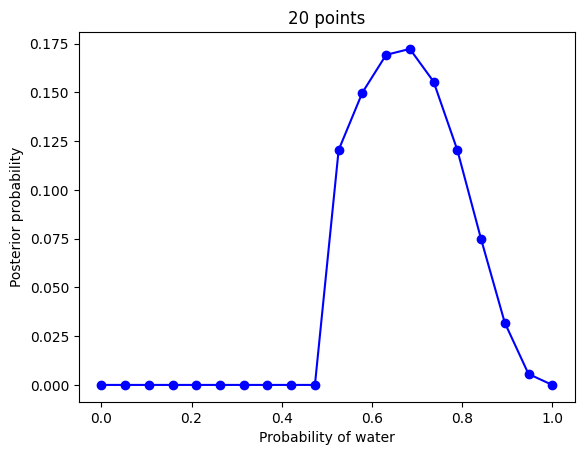

In [8]:
# Try with different priors
prior = np.where(p_grid < 0.5, 0, 1)
posterior = get_graph_approximation_posterior(p_grid, prior)

plot_graph_approximation(p_grid, posterior)

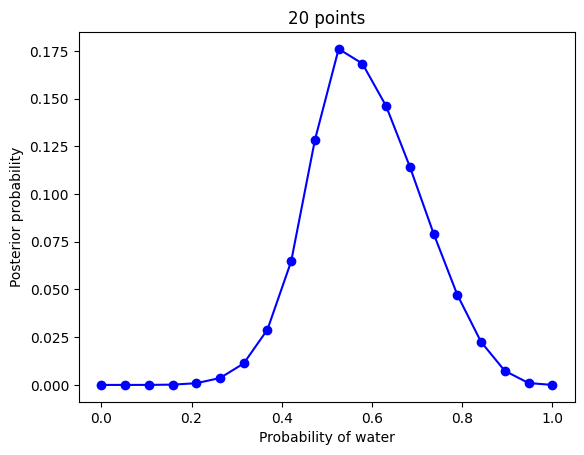

In [9]:
prior = np.exp(-5 * np.abs(p_grid - 0.5))
posterior = get_graph_approximation_posterior(p_grid, prior)
plot_graph_approximation(p_grid, posterior)

#### 2.4.4 Quadtratic Approximation

In [13]:
# Define the model
with pm.Model() as model:
    # Probability of success
    p = pm.Uniform("p", lower=0, upper=1)

    # Outcome variable
    W = pm.Binomial("W", p, 6 + 3)